In [1]:
%matplotlib widget
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import utils

import circle
import plot_utils

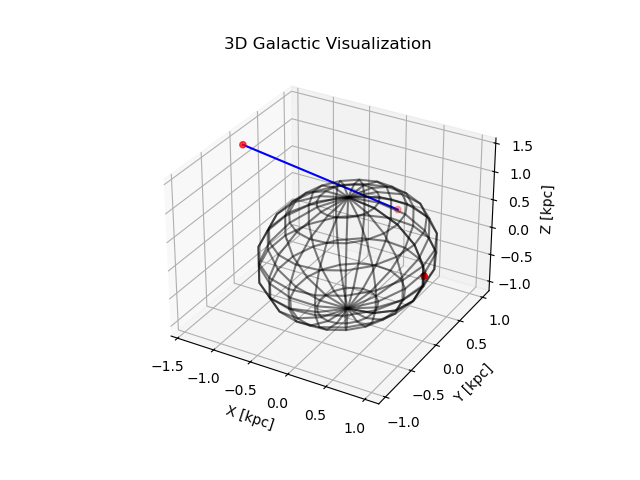

In [2]:

# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (0, 0, 1),   # Center of the galaxy
    (90, 0, 1),  # 90 degrees longitude
    (180, 45, 2) # Some point in space
]

# Convert to Cartesian coordinates for plotting
points = np.array([utils.galactic_to_cartesian(*coord) for coord in coordinates])

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# Draw lines between points
plot_utils.add_ray(ax, points[2], points[1])

# Add spherical shell at radius 1
plot_utils.add_spherical_shell(ax)
# Add labels
plot_utils.add_xyz_labels(ax)
ax.set_title('3D Galactic Visualization')

plt.show()


## Function for the arches implementation

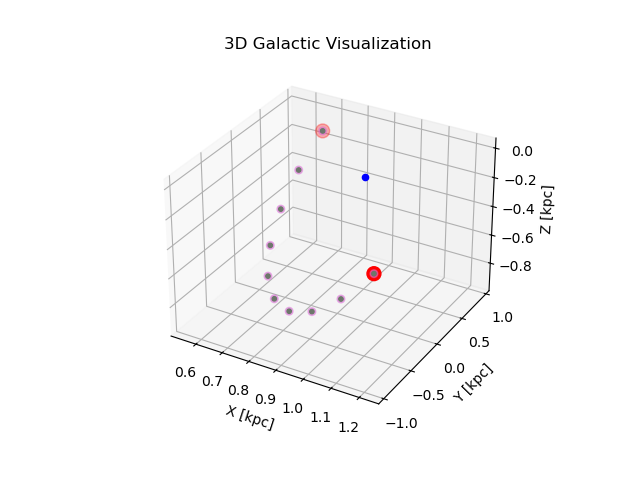

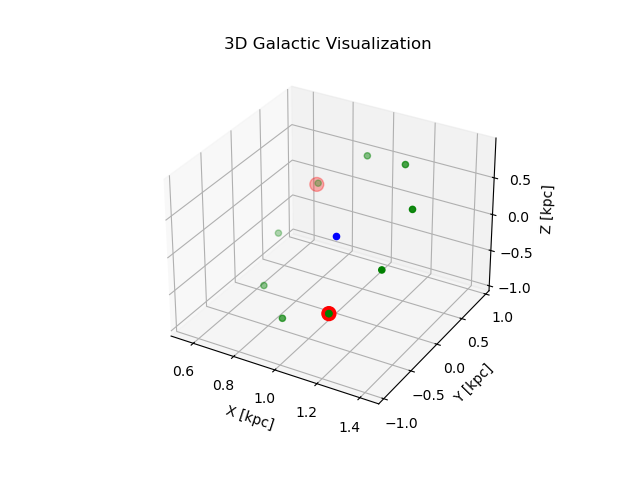

In [3]:


plot_utils.plot_test_circle()
plot_utils.plot_test_arch()



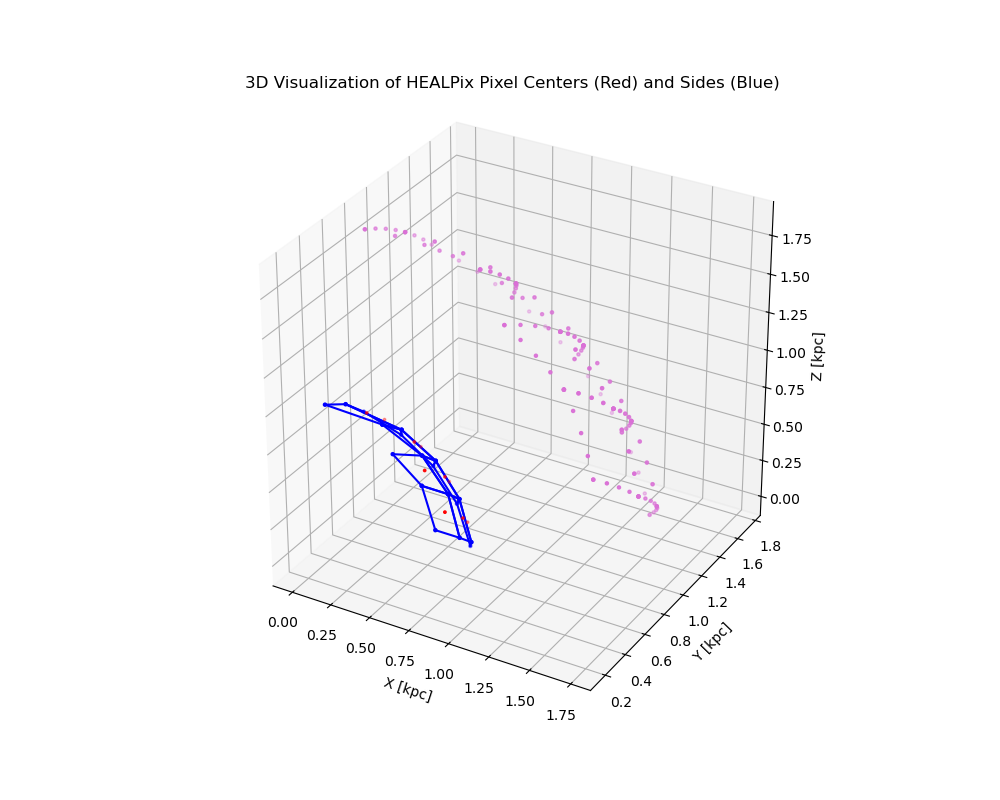

In [4]:




# Set the HEALPix resolution
nside = 4  # A manageable nside value for clear visualization
nest = True  # Use NESTED pixel ordering
# Prepare a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pixel_index_array = np.arange(hp.nside2npix(nside))[0:10]

#add_fullsky_healpix_centers(ax, nside)
#plot_utils.add_healpixels(ax, pixel_index_array, nside, nest=nest)

# # Set the aspect of the plot to be equal
ax.set_box_aspect([1,1,1])

# Add spherical shell at radius 1
#plot_utils.add_spherical_shell(ax)

#
plot_utils.add_healpix_boundaries(ax, pixel_index_array, nside, nest=nest)

plot_utils.add_healpix_centers(ax, pixel_index_array, nside, nest=nest)


plot_utils.add_healpix_arches_optimized(ax, pixel_index_array, nside, nest=nest, npoints=5, radius = 2)
# Add labels
plot_utils.add_xyz_labels(ax)
# Add a title
ax.set_title('3D Visualization of HEALPix Pixel Centers (Red) and Sides (Blue)')
ax.grid(True)

plt.show()

